<a href="https://colab.research.google.com/github/Renzo0o0/VaRHistoric-Andres-Rendon/blob/main/VaRHist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *VaR Andrés-Rendón*



#   PROYECTO: VaR Histórico Multi-Activo
#   AUTOR: Andrés Rendón
#   OBJETIVO: Cálculo de VaR 95% y 99% para un
#             portafolio institucional diversificado.




/tmp/ipython-input-59109325.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(tickers, start=start, end=end)
[                       0%                       ]

Descargando datos de mercado...


[*********************100%***********************]  8 of 8 completed


Datos descargados correctamente.
------ RESULTADOS VaR ------
VaR 95%: -1.7407%
VaR 99%: -3.2760%


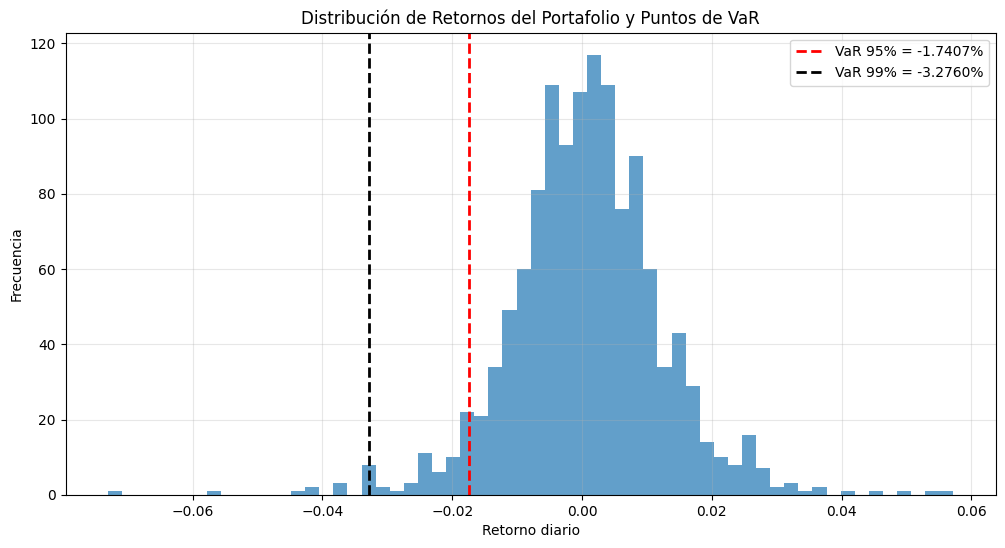


------ ANÁLISIS INSTITUCIONAL ------


ANÁLISIS DE RIESGO DEL PORTAFOLIO - INTERPRETACIÓN EJECUTIVA

1. GESTIÓN DE RIESGO DIARIO (VaR 95% = -1.7407%:
   Este nivel representa la pérdida máxima esperada en condiciones de mercado normales. 
   Con un 95% de confianza, las pérdidas diarias no excederán este umbral, estableciendo 
   el parámetro operativo para la gestión rutinaria del portafolio.

2. PROTOCOLO DE CRISIS (VaR 99% = -3.2760%):
   Constituye el límite de estrés severo, activando mecanismos de contingencia cuando 
   se supera. Este escenario, esperado solo 1 vez cada 100 días, requiere intervención 
   inmediata y revisión de estrategias.

3. CONTEXTO DE PERFORMANCE:
   Con un retorno promedio diario de 0.0701% y volatilidad 1.1738%, el perfil 
   riesgo-rendimiento sugiere una estrategia conservadora, indicando cobertura adecuada 
   para riesgos moderados.

4. IMPLICACIÓN PRÁCTICA:
   Estos niveles de VaR proporcionan puntos de referencia críticos para la toma de 
   deci

In [20]:

# ----- Imports -----
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----- Display settings -----
pd.set_option('display.precision', 6)

# ----- Definición del universo de activos -----
tickers = ["SPY", "EEM", "IEF", "EURUSD=X", "JPY=X", "GC=F", "BZ=F", "BTC-USD"]

# Pesos institucionales del portafolio:
weights = np.array([0.25, 0.10, 0.25, 0.10, 0.05, 0.10, 0.05, 0.10])

# Horizonte histórico
start = "2020-12-01"
end   = "2025-12-01"

# ===============================================
#   2. DATA: Descarga de precios y limpieza
# ===============================================

print("Descargando datos de mercado...")

# Descarga completa de OHLC
raw = yf.download(tickers, start=start, end=end)

# Extraer precios CLOSE del MultiIndex
prices = raw.xs('Close', level=0, axis=1)

# Eliminar valores faltantes
prices = prices.dropna()

print("Datos descargados correctamente.")
prices.tail()

# ===============================================
#   3. RETURNS: Retornos porcentuales diarios
# ===============================================

# Cálculo de retornos diarios (pct-change)
returns = prices.pct_change().dropna()

returns.tail()

# ===============================================
#   4. PORTFOLIO: Retornos del portafolio
# ===============================================

# r_p(t) = Σ w_i * r_i(t)
portfolio_returns = returns.dot(weights)

portfolio_returns.tail()

# ===============================================
#   5. VAR: Value-at-Risk Histórico
# ===============================================

def historical_var(series, level=0.95):
    """
    VaR Histórico usando el cuantil empírico.
    Interpreta la pérdida mínima esperada en el (1-alpha)% peor caso.
    """
    return np.percentile(series, (1-level)*100)


VaR_95 = historical_var(portfolio_returns, 0.95)
VaR_99 = historical_var(portfolio_returns, 0.99)

print("------ RESULTADOS VaR ------")
print(f"VaR 95%: {VaR_95:.4%}")
print(f"VaR 99%: {VaR_99:.4%}")

# ===============================================
#   6. PLOT: Distribución de retornos y líneas de VaR
# ===============================================

plt.figure(figsize=(12,6))
plt.hist(portfolio_returns, bins=60, alpha=0.7, density=False)

plt.axvline(VaR_95, color='red', linestyle='--', linewidth=2,
            label=f'VaR 95% = {VaR_95:.4%}')

plt.axvline(VaR_99, color='black', linestyle='--', linewidth=2,
            label=f'VaR 99% = {VaR_99:.4%}')

plt.title("Distribución de Retornos del Portafolio y Puntos de VaR")
plt.xlabel("Retorno diario")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ===============================================
#   7. ANALYSIS: Interpretación institucional
# ===============================================

worst_day = portfolio_returns.min()
mean_return = portfolio_returns.mean()
std_return = portfolio_returns.std()

print("\n------ ANÁLISIS INSTITUCIONAL ------\n")
print("================================================================================")

print(f"""
ANÁLISIS DE RIESGO DEL PORTAFOLIO - INTERPRETACIÓN EJECUTIVA

1. GESTIÓN DE RIESGO DIARIO (VaR 95% = {VaR_95:.4%}:
   Este nivel representa la pérdida máxima esperada en condiciones de mercado normales.
   Con un 95% de confianza, las pérdidas diarias no excederán este umbral, estableciendo
   el parámetro operativo para la gestión rutinaria del portafolio.

2. PROTOCOLO DE CRISIS (VaR 99% = {VaR_99:.4%}):
   Constituye el límite de estrés severo, activando mecanismos de contingencia cuando
   se supera. Este escenario, esperado solo 1 vez cada 100 días, requiere intervención
   inmediata y revisión de estrategias.

3. CONTEXTO DE PERFORMANCE:
   Con un retorno promedio diario de {mean_return:.4%} y volatilidad {std_return:.4%}, el perfil
   riesgo-rendimiento sugiere una estrategia conservadora, indicando cobertura adecuada
   para riesgos moderados.

4. IMPLICACIÓN PRÁCTICA:
   Estos niveles de VaR proporcionan puntos de referencia críticos para la toma de
   decisiones: el 95% para ajustes tácticos y el 99% para revisiones estratégicas
   ante crisis de mercado.
""")



